# Il significato sociale della musica in età evolutiva

## Motivazione

La produzione e fruizione della musica è una caratteristica universale del genere umano. I neonati umani imparano e ricordano le melodie e si muovono spontaneamente al ritmo della musica. I genitori cantano frequentemente delle canzoni ai loro figli piccoli, in uno stile che è comune a molte culture. Ci possiamo dunque chiedere quale sia la *funzione* di questo comportamento dei genitori nei confronti dei loro figli. Mehr, Song e Spelke (2016) esplorano l'ipotesi che la melodia, una caratteristica saliente della musica vocale, trasmetta informazioni sociali ai bambini.   

Per valutare questa ipotesi, Mehr et al. (2016) esaminano un campione di 32 bambini di età media pari a 5.6 mesi (SD = 0.31, gamma di variazione: 5.1--6.1). Nel loro primo esperimento, Mehr e al. si chiedono se la familiarità con una melodia possa modulare una preferenza sociale, ovvero possa influenzare i tempi di fissazione dello sguardo (_looking-time_) che i bambini dirigono verso un individuo adulto sconosciuto che, cantando, produce una melodia conosciuta.

Nella prima fase dell'esperimento, ai genitori dei bambini veniva chiesto di imparare una nuova ninna-nanna e di ripeterla spesso al figlio/a. Nella seconda fase dell'esperimento, ai bambini venivano presentati due video, uno di fianco all'altro.  Uno dei due video faceva vedere uno sconosciuto che cantava la melodia che, in precedenza, i genitori avevano presentato ai bambini; l'altro video faceva vedere uno sconosciuto che cantava una ninna-nanna diversa. La variabile dipendente era il tempo di fissazione dello sguardo del bambino.

![](melody.png)

Nelle prove baseline (16 s ciascuna), ai bambini vennero presentati due video che facevano vedere gli stessi due adulti che, nella fase test, cantavano le due melodie; in questo caso, però gli attori non cantavano ma si limitavano a sorridere.

Mediante una prima analisi statistica gli autori hanno verificato che i bambini non dimostravano alcuna preferenza per uno dei due sconosciuti, quando questi non cantavano. In una seconda analisi statistica, gli autori si sono chiesti se i tempi di fissazione dello sguardo fossero maggiori quando lo sconosciuto cantava la ninna-nanna familiare piuttosto che quella non familiare. 

L'analisi statistica eseguita dagli autori è un test $t$ di Student. L'articolo di Mehr et al. (2016) riporta un valore della statistica test pari a $t_{31} = 2.96$, un $p$-valore di 0.06 e un intervallo di confidenza al 95% pari a [0.529, 0.658]. La dimensione dell'effetto, misurata con un $d$ di Cohen, è pari a 0.52.

Lo scopo dell'analisi statistica riportata qui di seguito è quello di replicare questi risultati mediante l'analisi dei dati messi a disposizione dagli autori. La stessa analisi statistica verrà eseguita usando due metodi diversi: l'approccio frequentista e l'approccio bayesiano.

## Analisi dei dati

Per replicare i risultati riportati da  Mehr et al. (2016), importiamo i dati contenuti nel file `MehrSongSpelke_exp_1.csv`. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from scipy import stats as st
import seaborn as sns
import arviz as az
import bambi as bmb
import pymc as pm
from pymc import HalfNormal, Model, Normal, sample
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

%config InlineBackend.figure_format = 'retina'
%load_ext watermark

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Il DataFrame è costituito da 96 righe e 153 colonne.

In [2]:
tot_df = pd.read_csv("MehrSongSpelke_exp_1.csv")
tot_df.shape


(96, 153)

Esamino i nomi delle colonne.

In [3]:
print(*tot_df.columns)

id study_code exp1 exp2 exp3 exp4 exp5 dob dot1 dot2 dot3 female dad train Baseline_Proportion_Gaze_to_Singer Familiarization_Gaze_to_Familiar Familiarization_Gaze_to_Unfamiliar Test_Proportion_Gaze_to_Singer Difference_in_Proportion_Looking Estimated_Total_Number_of_Song totskypesing stim othersing comply_no module skype_before ammat ammar ammatot ammapr ipad_num famtot_6 unfamtot_6 totprac totw totnw age length delay mtotsing mbabylike msingcomf mtotrecord m_othersong pright diarymissing comply_fup survey_completion smsingrate smtalkrate gzsingrate gztalkrate famtot unfamtot totsing1 babylike1 singcomf1 totrecord1 othersong1 dtword1 dtnoword1 totsing2 babylike2 singcomf2 totrecord2 othersong2 dtword2 dtnoword2 totsing3 babylike3 singcomf3 totrecord3 othersong3 dtword3 dtnoword3 totsing4 babylike4 singcomf4 totrecord4 othersong4 dtword4 dtnoword4 totsing5 babylike5 singcomf5 totrecord5 othersong5 dtword5 dtnoword5 totsing6 babylike6 singcomf6 totrecord6 othersong6 dtword6 dtnoword6 to

Considero la colonna `exp1`.

In [4]:
tot_df["exp1"].unique()

array([1, 0])

Quando `exp1` assume il valore 1 le osservazioni (righe) appartengono al primo esperimento. Seleziono dunque i dati del primo esperimento.

In [5]:
df = tot_df[tot_df["exp1"] == 1]
df.shape

(32, 153)

La variabile `Test_Proportion_Gaze_to_Singer` viene usata per la seconda delle due analisi descritte sopra. Creo un istogramma lisciato (KDE plot, o stima della densità della frequenza dei dati) di questa variabile.

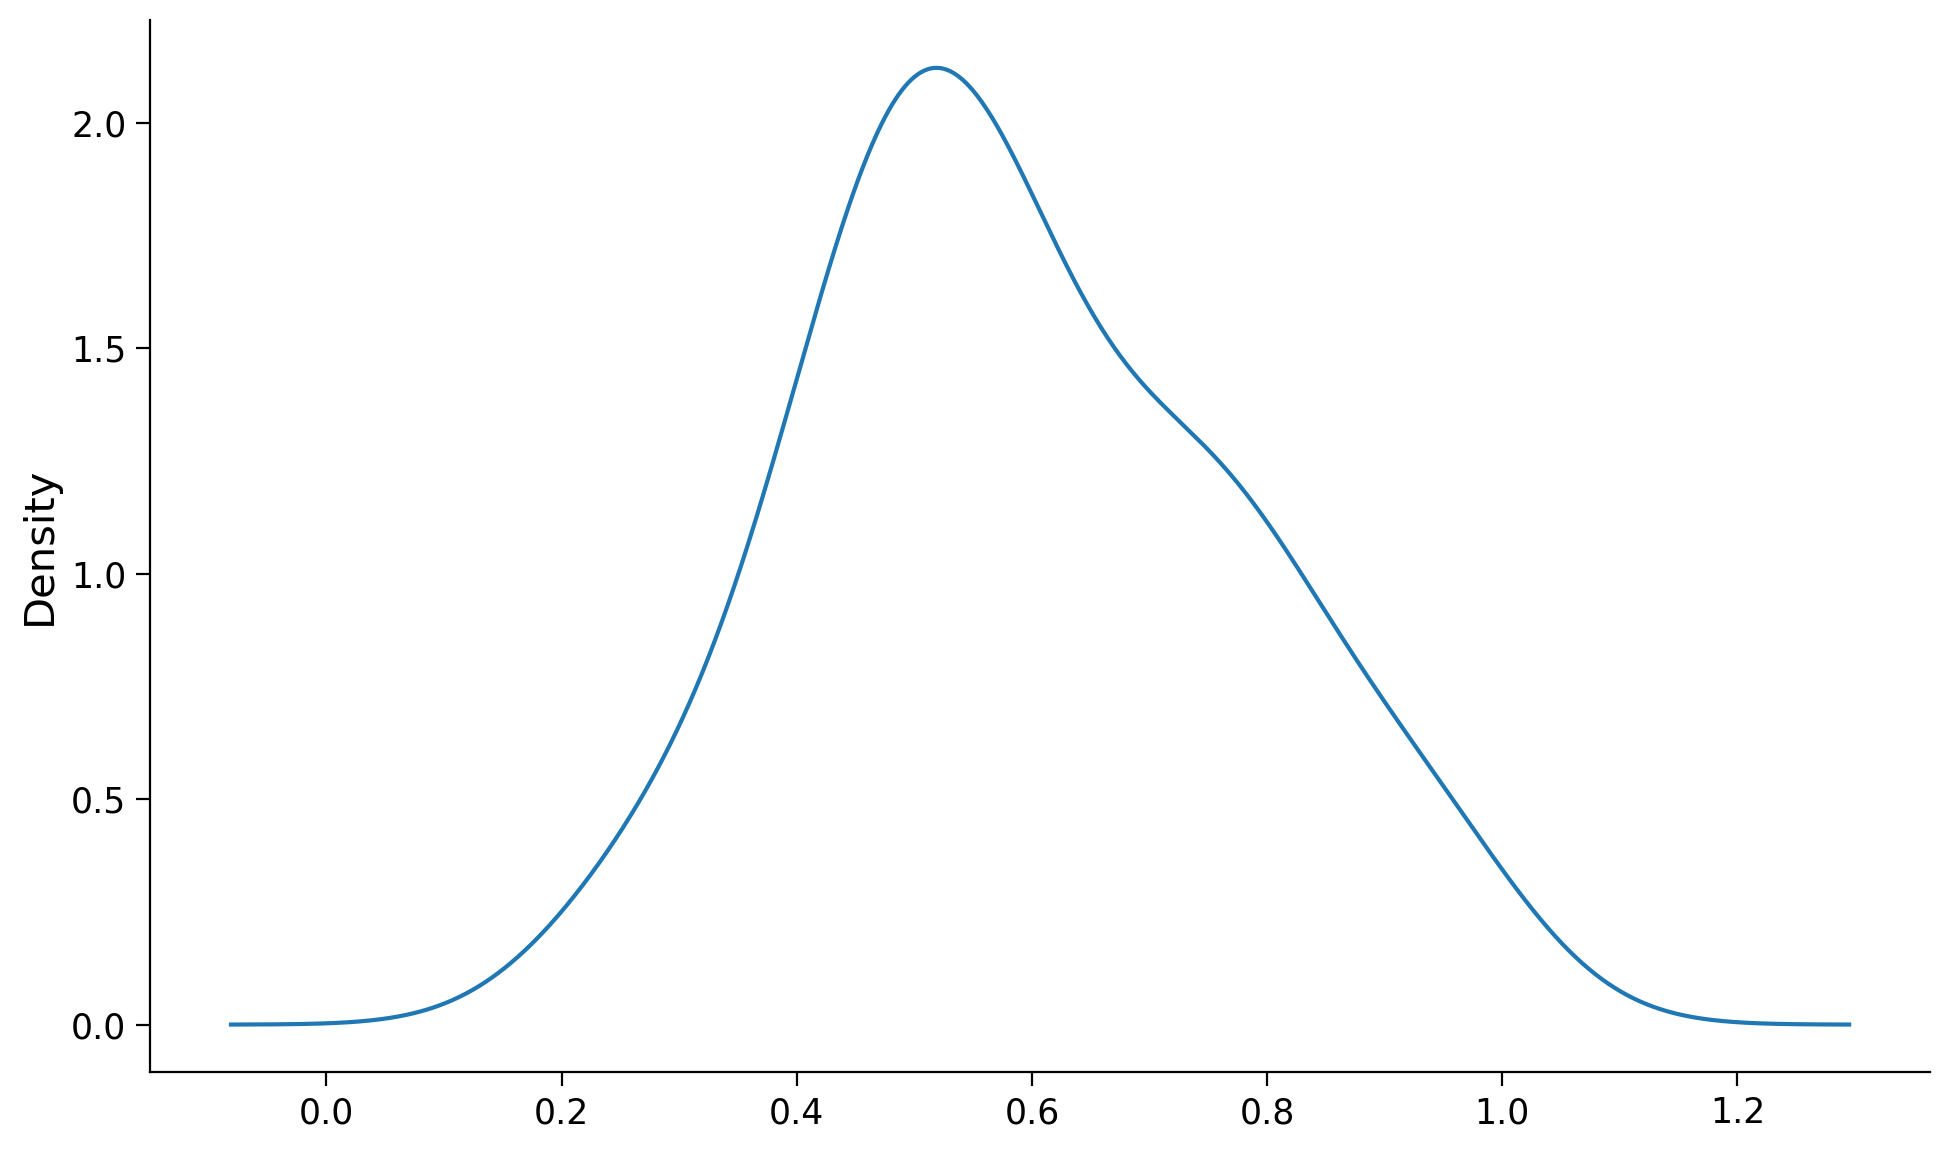

In [6]:
plt.figure(figsize=(10, 6))
df["Test_Proportion_Gaze_to_Singer"].plot.kde();

Media, mediana, deviazione standard, minimo e massimo delle proporzioni del tempo intercorso a fissare la faccia della persona target si ottengono nel modo seguente:

In [7]:
import statistics

summary_stats = [min, statistics.median, statistics.mean, statistics.stdev, max]
print(df["Test_Proportion_Gaze_to_Singer"].aggregate(summary_stats))

min       0.262846
median    0.556953
mean      0.593491
stdev     0.178688
max       0.950920
Name: Test_Proportion_Gaze_to_Singer, dtype: float64


### Test $t$ di Student per un solo campione

#### Approccio frequentista

Utilizzo l'approccio frequentista per fare inferenza su $\mu$, ovvero sulla proporzione media del tempo complessivo di fissazione dello sguardo verso lo sconosciuto che cantava la melodia familiare, piuttosto che verso lo sconosciuto che cantava una canzone ignota. Nel caso della procedura di test di ipotesi, l'ipotesi nulla è 

$$
H_0: \mu = 0.5.
$$

Se non vi è alcuna preferenza, `Test_Proportion_Gaze_to_Singer` dovrebbe assumere il valore 0.5. Se i bambini preferiscono la melodia familiare, il valore medio di `Test_Proportion_Gaze_to_Singer` dovrebbe essere maggiore di 0.5; se i bambini preferiscono la melodia sconosciuta, il valore medio di `Test_Proportion_Gaze_to_Singer` dovrebbe essere minore di 0.5. 

Inizio ad esaminare la distribuzione dei dati. Assumo una distribuzione gaussiana e produco un diagramma quantile-quantile.

<Figure size 1000x600 with 0 Axes>

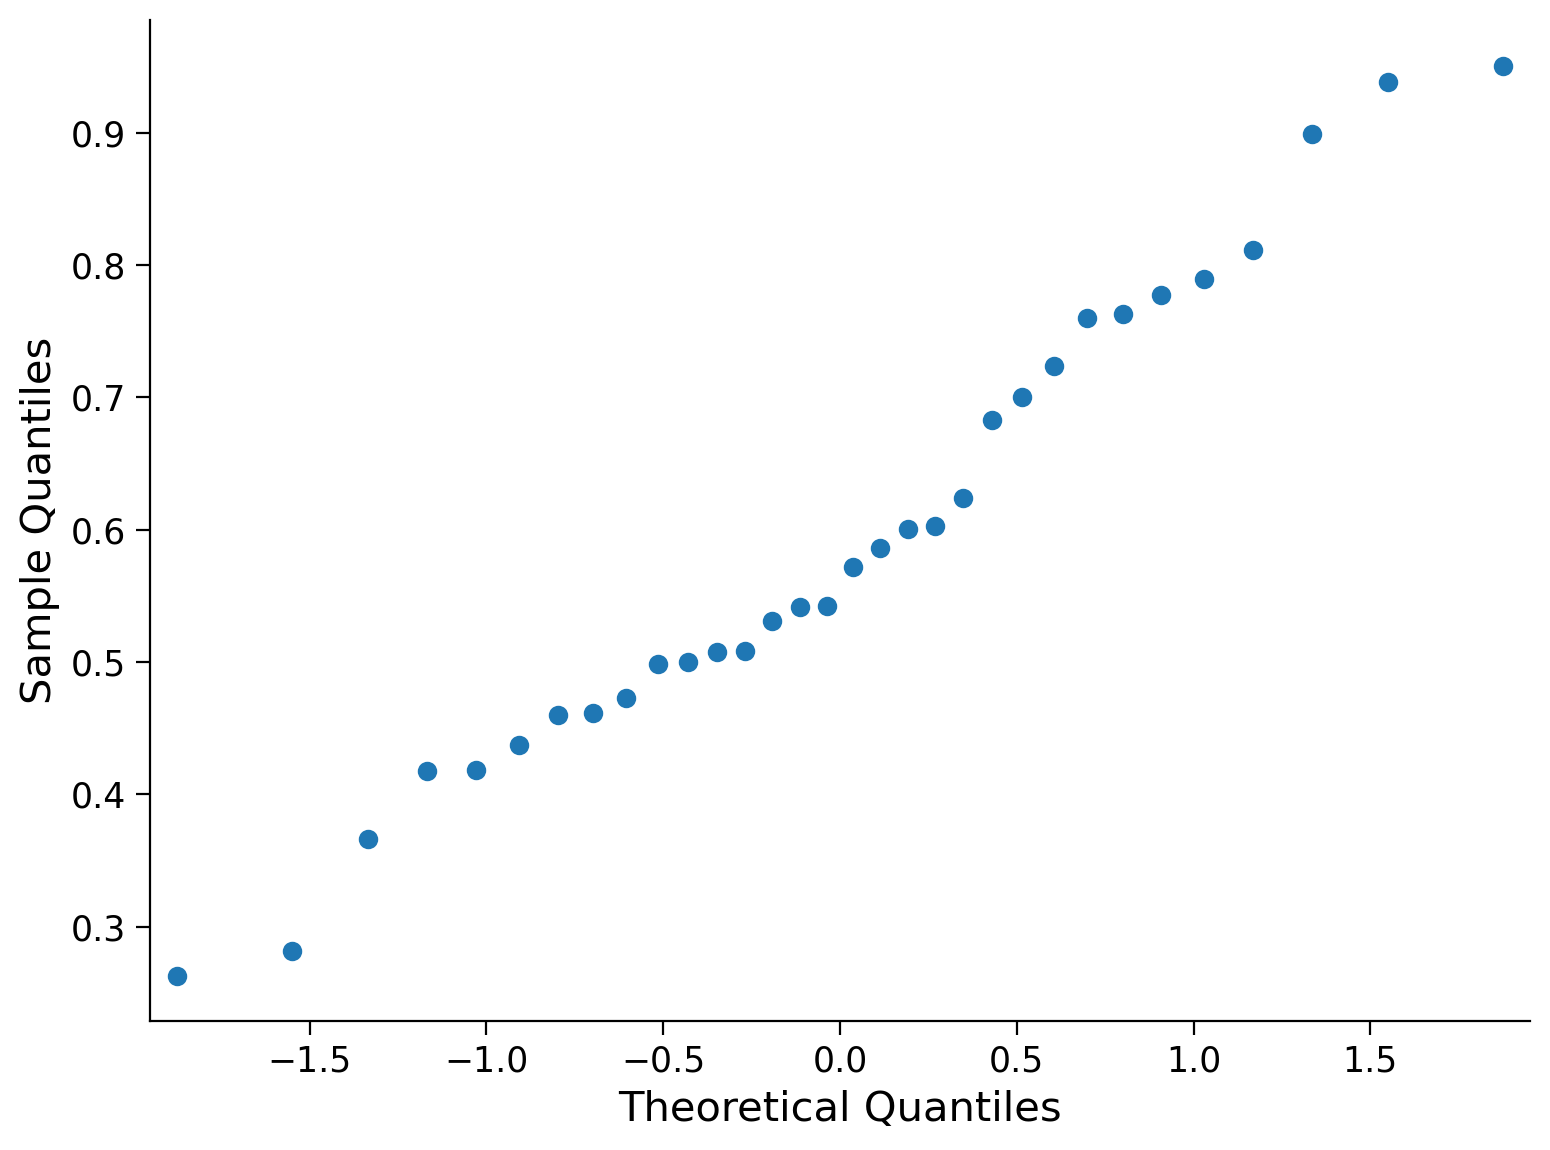

In [8]:
import statsmodels.api as sm

plt.figure(figsize=(10, 6))
sm.qqplot(df["Test_Proportion_Gaze_to_Singer"]);

Il plot è ragionevolmente lineare per assumere la gaussianità. Dato che l'assunzione di gaussianità è ragionevole, procedo con il $t$ test.

La proporzione del looking-time diretta allo sconosciuto che canta la melodia familiare è

In [9]:
m = df["Test_Proportion_Gaze_to_Singer"].mean()
m

0.59349125

L'errore standard della media è 

$$
\sigma_{\bar{y}} = \frac{\sigma}{\sqrt{n}}
$$

ovvero

In [10]:
n = len(df["Test_Proportion_Gaze_to_Singer"])
s = np.std(df["Test_Proportion_Gaze_to_Singer"], ddof=1)
std_err = s / np.sqrt(n)
std_err

0.031587938876386126

Applico la formula per il calcolo della statistica *T*

$$
T = \frac{\bar{y} - \mu_0}{\hat{\sigma}_{\bar{y}}} = \frac{0.59 - 0.50}{0.032} = 2.96
$$

ovvero

In [11]:
T = (m - 0.5) / std_err
T

2.9597135275543516

I gradi di libertà sono:

In [12]:
dof = n - 1
dof

31

Per un test bidirezionale, il $p$-valore diventa

In [13]:
2 * (1 - st.t.cdf(T, n - 1))

0.005855685399372312

Questi risultati si possono facilmente ottenrere usando la funzione ```t.test()```:

In [14]:
st.ttest_1samp(a=df["Test_Proportion_Gaze_to_Singer"], popmean=0.5)

TtestResult(statistic=2.959713527554351, pvalue=0.0058556853993721875, df=31)

e coincidono con quelli trovati sopra e con quelli riportati dagli autori.

L'intervallo di confidenza al 95% si calcola come

$$
\text{stima del parametro} \pm t \times \text{errore standard}
$$

Nel caso presente, abbiamo:

In [15]:
[m + sign * st.t.ppf(0.975, n - 1) * std_err for sign in [-1, 1]]

[0.5290672239176627, 0.6579152760823374]

Tale risultato riproduce quello riportato da Mehr et al. (2016).

Una stima della dimensione dell'effetto si ottiene come il rapporto tra la differenza tra le medie (in questo caso, proporzioni) e la deviazione standard:

In [16]:
round((m - 0.5) / np.std(df["Test_Proportion_Gaze_to_Singer"], ddof=1), 2)

0.52

Anche questo risultato coincide con il valore riportato dagli autori.

#### Analisi Bayesiana

Facciamo inferenza su $\mu$ usando l'approccio bayesiano. I dati sono i seguenti:

In [17]:
y = df["Test_Proportion_Gaze_to_Singer"]

Considero $y$ (così come hanno fatto gli autori) come una variabile continua per la quale è sensato assumere un meccanismo generatore dei dati gaussiano di media e deviazione standard ignote. L'inferenza riguarda il parametro $\mu$ della distribuzione.

In [18]:
model1 = pm.Model()

with model1:

    # Priors
    mu = pm.Normal("mu", mu=0.5, sigma=0.5)
    sigma = pm.HalfCauchy("sigma", beta=1)
    # Likelihood of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=y)
    trace1 = pm.sample()

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [mu, sigma]


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


La convergenza e il "mixing" del campionamanto MCMC possono essere controllate mediante il _trace plot_ che mostra l'andamento delle simulazioni e ci dice se stiamo effettivamente utilizzando una distribuzione limite:

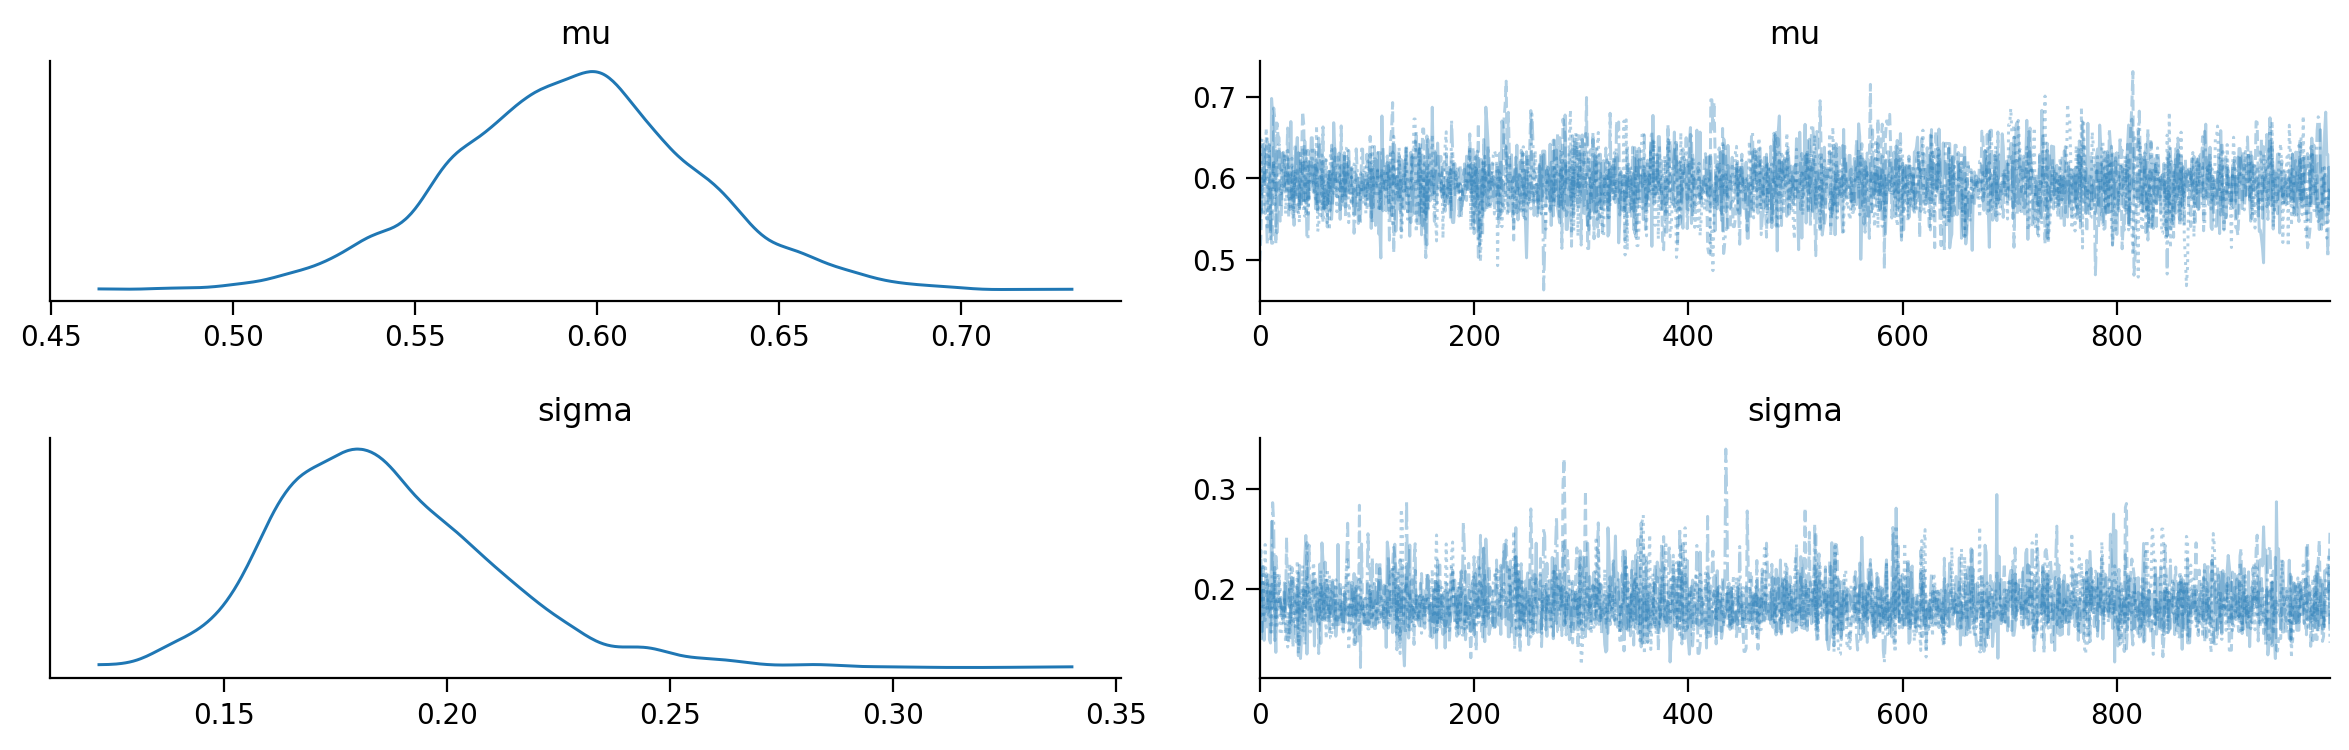

In [19]:
az.plot_trace(trace1, combined=True);

Esamino una sintesi della distribuzione a posteriori del parametro $\mu$.

In [20]:
az.summary(trace1, hdi_prob=0.95, round_to=3)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,0.593,0.034,0.525,0.660,0.001,0.0,3389.996,2167.792,1.000
sigma,0.186,0.025,0.137,0.235,0.000,0.0,3459.256,2410.795,1.001


I risultati sono simili a quelli riportati dagli autori.

Utilizzo ora una distribuzione a priori Beta, più adeguata per una proporzione.

In [21]:
model2 = pm.Model()

with model2:

    # Priors 
    mu = pm.Beta("mu", alpha=2, beta=2)
    sigma = pm.HalfCauchy("sigma", beta=1)
    # Likelihood of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=y)
    trace2 = pm.sample()

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [mu, sigma]


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


Esamino la distribuzione a posteriori.

In [22]:
az.summary(trace2, hdi_prob=0.95, round_to=3)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,0.592,0.033,0.529,0.660,0.001,0.0,3533.965,2256.625,1.001
sigma,0.186,0.025,0.142,0.237,0.000,0.0,3452.961,2674.846,1.001


I risultati sono quasi identici a quelli trovati in precedenza.

Posso dunque concludere, con un grado di certezza soggettiva del 95%, che sono sicuri che la proporzione del tempo complessivo di fissazione dello sguardo verso lo sconosciuto che cantava la melodia familiare, piuttosto che verso lo sconosciuto che cantava una canzone ignota, è compresa nell'intervallo [0.53, 0.66]. Dato che questo intervallo non include il valore 0.5, ritengo dunque che i bambini abbiamo dimostrato una preferenza verso lo sconosciuto che cantava una melodia familiare.

### Confronto tra due gruppi

#### Approccio frequentista (test $t$ di Student per campioni appaiati)

Mehr e al. (2016) hanno confrontato il tempo di fissazione dello sguardo verso lo sconosciuto che sorride soltanto e lo sconosciuto che canta la melodia familiare.  La distribuzione dei tempi di fissazione dello sguardo nelle due condizioni è presentata nel pannello a della Figura 2 del loro articolo. Riproduco qui sotto la figura. I tempi di fissazione dello sguardo nelle condizioni baseline e test corrispondono, rispettivamente, alle variabili `Baseline_Proportion_Gaze_to_Singer` e `Test_Proportion_Gaze_to_Singer`. 

Per replicare la Figura 2a riportata nell'articolo devo convertire i dati nel formato *long*, ovvero nel formato in cui a ciascuna colonna del DataFrame corrisponde una variabile. Nel caso presente, creo una variabile chiamata *condizione*, con modalità *baseline* e *test*; una seconda variabile, *y*, descrive i tempi di fissazione dello sguardo. Per creare un DataFrame che contiene queste due variabili, procedo come segue.

In [23]:
y = [df["Baseline_Proportion_Gaze_to_Singer"], df["Test_Proportion_Gaze_to_Singer"]]
y = [item for sublist in y for item in sublist]
group = [
    ["baseline"] * len(df["Baseline_Proportion_Gaze_to_Singer"]),
    ["test"] * len(df["Test_Proportion_Gaze_to_Singer"]),
]
grp = [item for sublist in group for item in sublist]
mydata = pd.DataFrame()
mydata["group"] = grp
mydata["y"] = y
mydata.head()

,group,y
0,baseline,0.437126
1,baseline,0.412533
2,baseline,0.754491
3,baseline,0.438878
4,baseline,0.474645


Creo una figura che combina un violin plot e un boxplot.

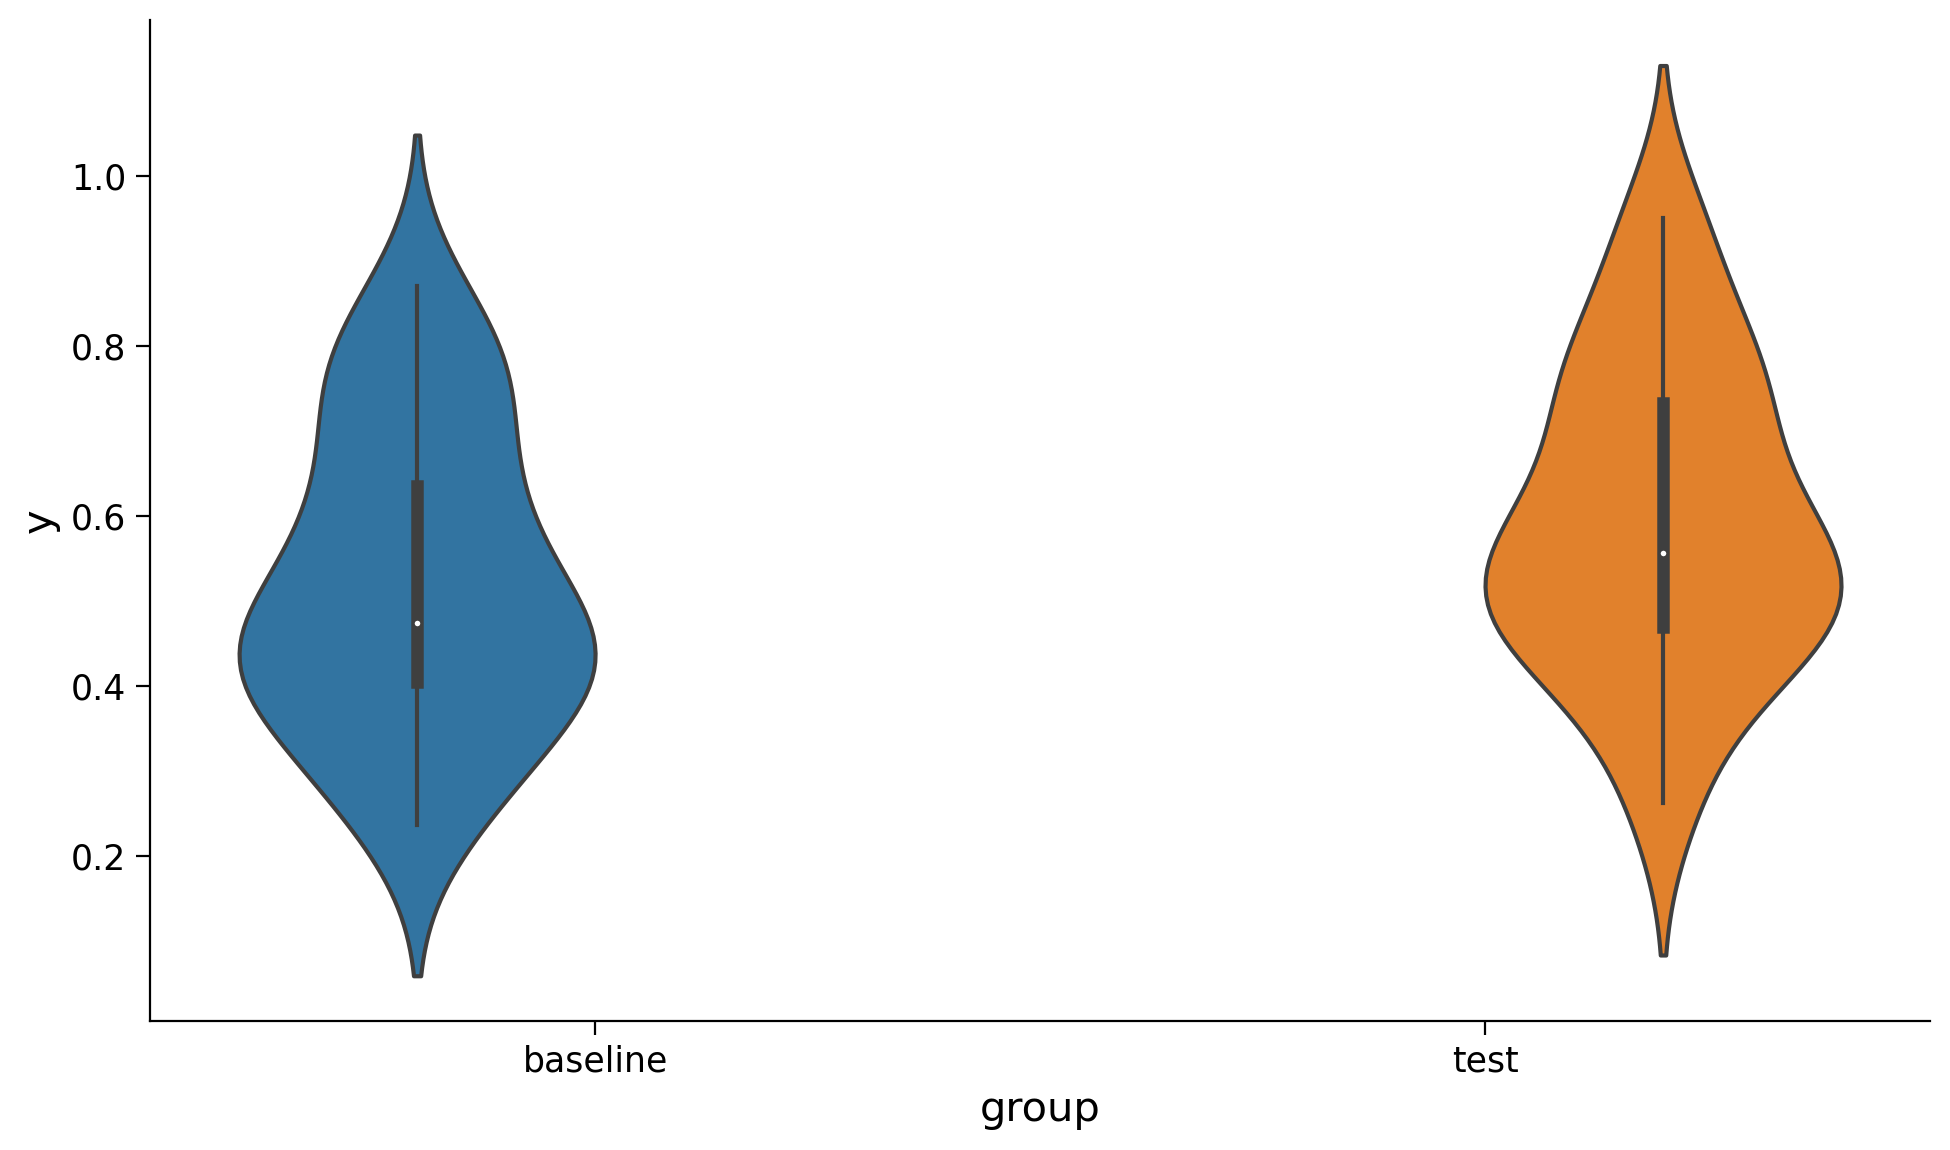

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="group", y="y", hue="group", data=mydata)
plt.legend([], [], frameon=False);

Un confronto tra queste due condizioni viene effettuato con un test $t$ di Student per campioni appaiati. Ovvero

In [25]:
diff = df["Test_Proportion_Gaze_to_Singer"] - df["Baseline_Proportion_Gaze_to_Singer"]
diff

0     0.165614
1     0.270494
2    -0.030353
3    -0.157224
4     0.023897
5     0.080019
6     0.181040
7     0.178943
8     0.083665
9    -0.213239
10    0.093946
11   -0.189512
12    0.217782
13   -0.043105
14    0.162541
15   -0.053986
16    0.197520
17   -0.067392
18    0.072766
19    0.096815
20   -0.145358
21    0.532836
22    0.060108
23    0.241541
24   -0.005447
25    0.177075
26    0.131705
27    0.057314
28   -0.279319
29    0.110225
30    0.340925
31    0.024790
dtype: float64

Verifico la gaussianità dei dati:

<Figure size 1000x600 with 0 Axes>

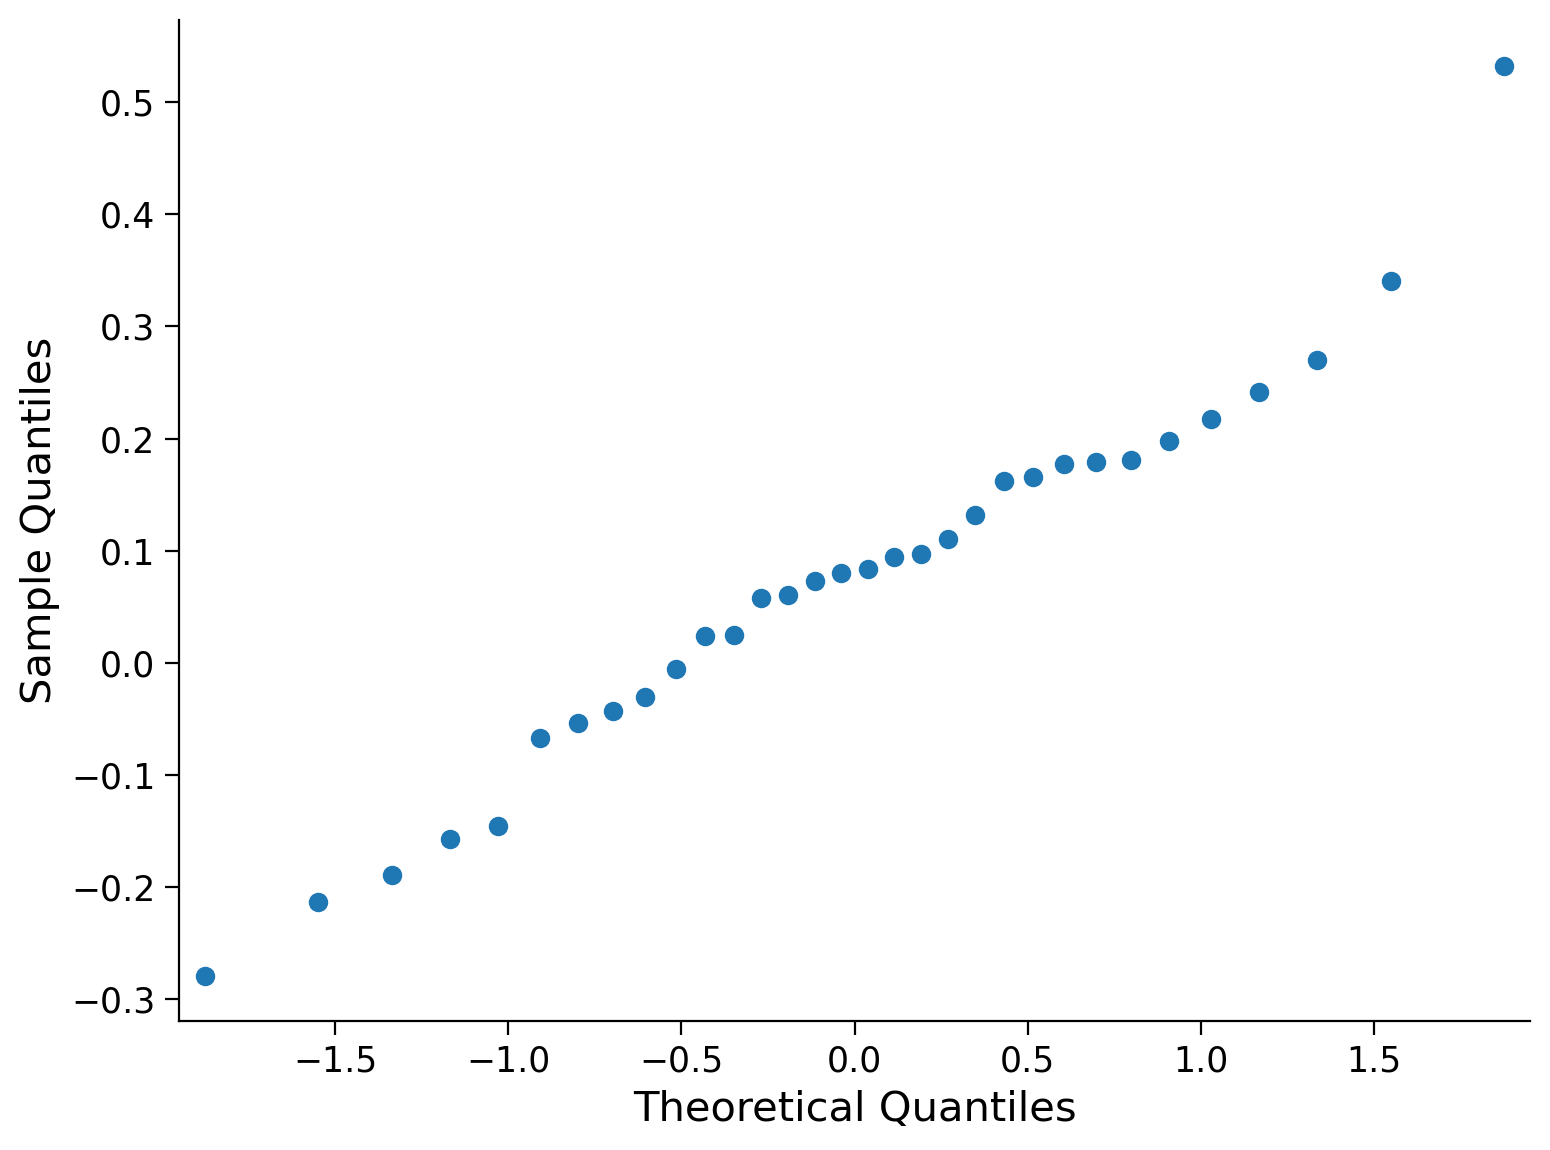

In [26]:
plt.figure(figsize=(10, 6))
sm.qqplot(diff);

La media delle differenze è:

In [27]:
m = np.mean(diff)
m

0.07239457500000002

In [28]:
n = len(diff)
s = np.std(diff, ddof=1)
std_err = s / np.sqrt(n)
std_err

0.02995930592625408

La statistica $T$ è:

In [29]:
T = (m - 0) / std_err
T

2.4164303131121225

In [30]:
2 * (1 - st.t.cdf(T, len(diff) - 1))

0.0217529308405513

Questi risultati replicano i valori riportati dagli autori: $t_{31}$ = 2.42, $p$ = 0.022.

L'intervallo di confidenza è

In [31]:
[m + sign * st.t.ppf(0.975, len(diff) - 1) * std_err for sign in [-1, 1]]

[0.011292167718701236, 0.1334969822812988]

La dimensione dell'effetto è

In [32]:
d = np.mean(diff) / np.std(diff)
d

0.434003696213157

Le stime dell'intervallo di confidenza e della dimensione dell'effetto coincidono con i valori riportati da Mehr e al. (2016).

#### Analisi bayesiana

Dato che, nel caso di campioni appaiati, abbiamo un unico valore della varibile dipendente per ciascuna "coppia", l'analisi statistica è sostanzialmente identica a quella già descritta sopra. In questo caso, la variabile dipendente è chiamata `diff`.

In [33]:
model3 = pm.Model()

with model3:

    # Priors
    mu = pm.Beta("mu", alpha=2, beta=2)
    sigma = pm.HalfCauchy("sigma", beta=1)
    # Likelihood of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=diff)
    trace3 = pm.sample()

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [mu, sigma]


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


In [34]:
az.summary(trace3, hdi_prob=0.95, round_to=3)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,0.085,0.029,0.028,0.142,0.001,0.0,2243.704,1157.404,1.004
sigma,0.177,0.024,0.134,0.225,0.000,0.0,2588.336,2291.778,1.002


I risultati sono molto simili ai precedenti. Anche la stima della dimensione dell'effetto è simile a quella trovata sopra.

In [35]:
0.084 / 0.176

0.47727272727272735

### Analisi di regressione

#### Approccio frequentista

Mehr et al. (2016) affermano

> We used simple linear regression to investigate whether the degree of infants’ increase in attention to the singer of the familiar song from baseline to test depended on their level of in-home exposure to that song. Parents reported singing regularly to their infants (median of 9 performances per day, interquartile range = [4, 11]; estimated total number of song performances: M = 76, SD = 56). After a log2 transformation (because of strong curvature), song exposure was a significant predictor of the within-subjects main effect (Fig. 2b), χ2(1) = 7.53, p = .006, R2 = .14 (Wald test).

Iniziamo a replicare questa analisi statistica usando l'approccio frequentista. Per semplicità, rinomino le due variabili di interesse.

In [36]:
y = df['Difference_in_Proportion_Looking']

Applico una trasformazione $log_2$ a $x$ come riportato dagli autori:

In [37]:
x = df["Estimated_Total_Number_of_Song"]
x = np.log2(x)
[np.min(x), np.max(x)]

[3.700439718141092, 7.936637939002571]

Creo un diagramma a dispersione con la retta di regressione:

Text(0.5, 0, 'Estimated Number of Times Infant Heard Song ($\\log_2$)')

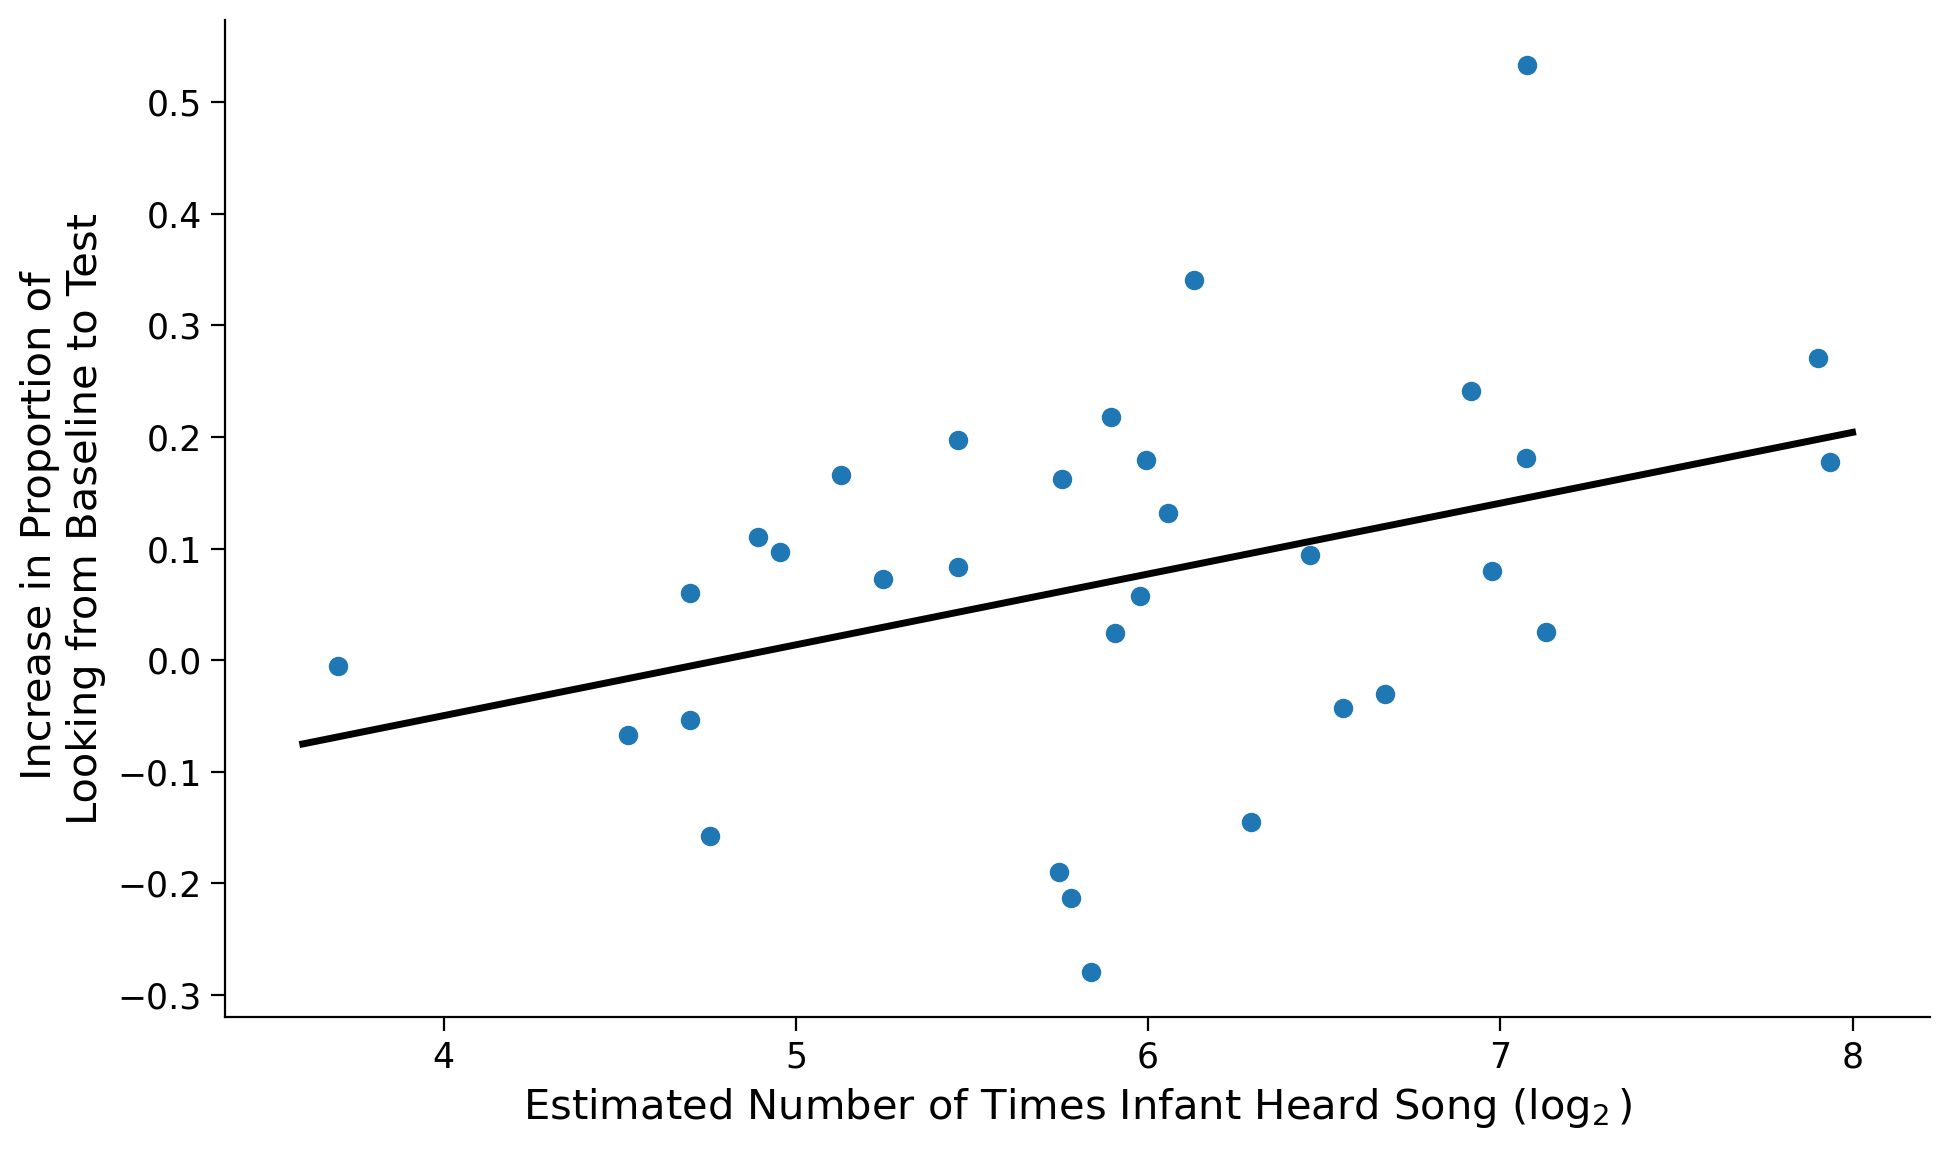

In [38]:
# Create a new figure and a set of subplots (which includes the axes)
fig, ax = plt.subplots(figsize=(10, 6))

# Add scatterplot
ax.plot(x, y, "o")

# Fit linear regression via least squares with numpy.polyfit
# It returns a slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 3.6 to 8
xseq = np.linspace(3.6, 8, num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

# Set the y-axis label
ax.set_ylabel("Increase in Proportion of \nLooking from Baseline to Test")

# Set the x-axis label
ax.set_xlabel("Estimated Number of Times Infant Heard Song ($\log_2$)")

Svolgo l'analisi di regressione con `statmodels`. L'unico indice che gli autori riportanto è $R^2$. Il risultato ottenuto qui conferma ciò che è riportato nell'articolo (gli autori riportano anche una statistica $\chi^2$ che è piuttosto anomala per una regressione).

In [39]:
from statsmodels.formula.api import ols

model = ols("y ~ x", df).fit()
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     4.793
Date:                Sun, 17 Sep 2023   Prob (F-statistic):             0.0365
Time:                        11:07:07   Log-Likelihood:                 14.275
No. Observations:                  32   AIC:                            -24.55
Df Residuals:                      30   BIC:                            -21.62
Df Model:                           1                                         
Covariance Type:            nonrobust  

Poniamo attenzione qui alla stima del coefficiente $\beta$ (l'effetto della $x$ sulla $y$) e all'intervallo di fiducia frequentista per questo parametro.

#### Inferenza bayesiana

Svolgo ora la stessa analisi usando l'approccio bayesiano. Dato che userò delle priors debolmente informative, mi aspetto che i risultati siano molto simili ai precedenti.

In [40]:
with Model() as model4:

    # Define priors
    alpha = pm.Normal("alpha", mu=0, sigma=2)
    beta = pm.Normal("beta", mu=0, sigma=2)
    sigma = pm.HalfCauchy("sigma", beta=2)
    # Expected value of outcome
    mu = alpha + beta * x
    # Likelihood of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=y)
    trace4 = pm.sample(5000)

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [alpha, beta, sigma]


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 22 seconds.


KeyboardInterrupt: 

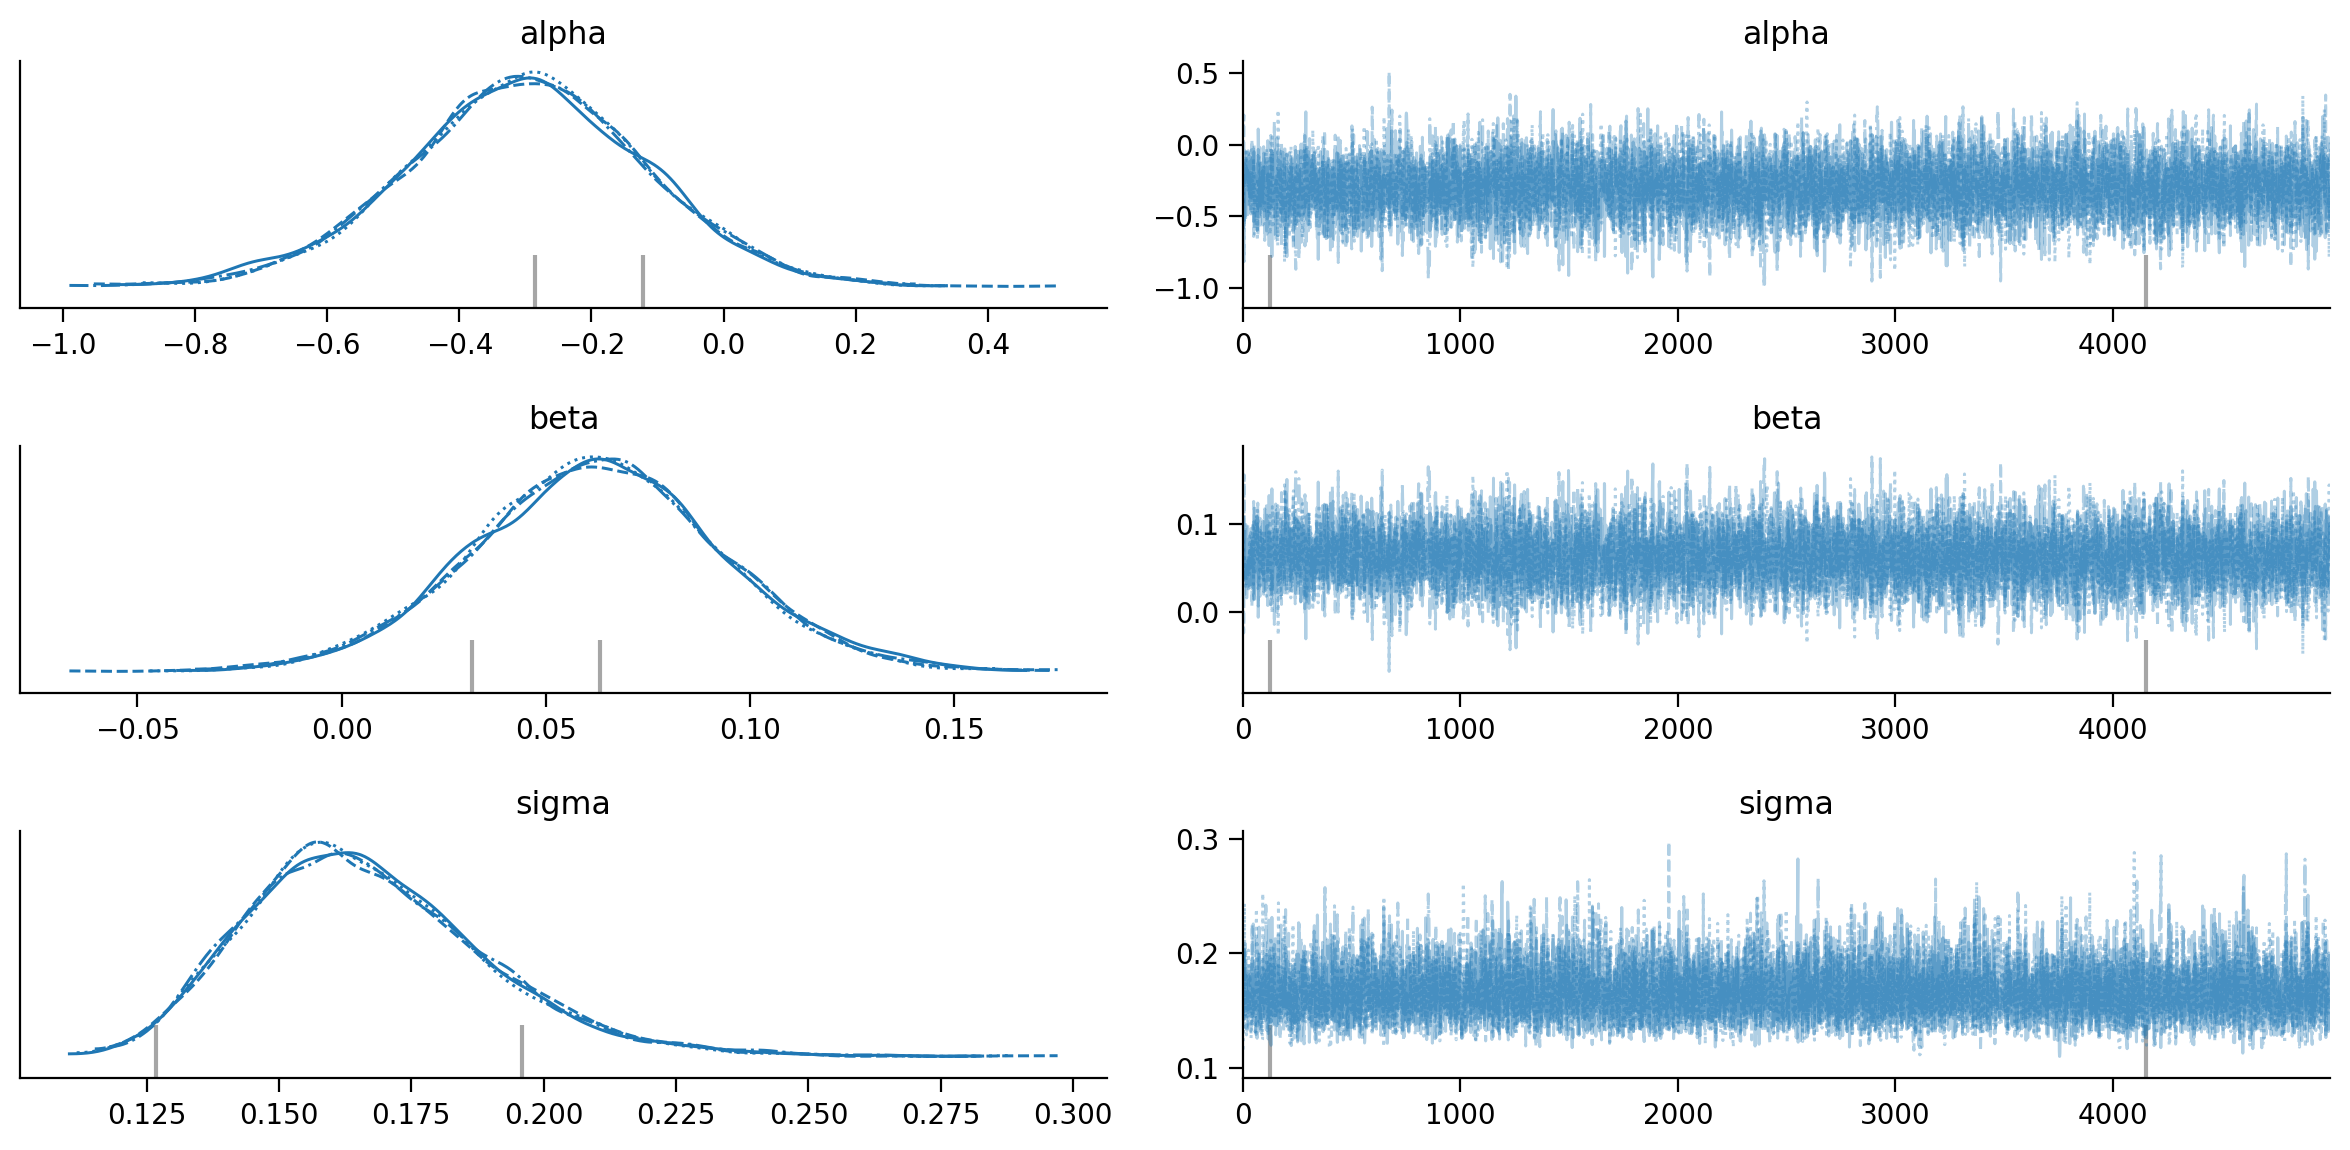

In [50]:
var_names = ["alpha", "beta", "sigma"]
az.plot_trace(trace4, var_names=var_names);

In [51]:
az.summary(trace4, hdi_prob=0.95, round_to=4)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.2990,0.1820,-0.6515,0.0691,0.0022,0.0016,6748.7640,7685.8171,1.0005
beta,0.0627,0.0302,0.0037,0.1233,0.0004,0.0003,6747.0075,7299.0920,1.0005
sigma,0.1666,0.0226,0.1273,0.2126,0.0003,0.0002,8217.2372,7864.9461,1.0001


Come mi attendevo, la stima dei coefficienti è molto simile a quella frequentista. Anche gli intervalli di credibilità sono molto simili agli intervalli di fiducia.


## Conclusioni

Mehr e al. (2016) riportano che i bambini di cinque mesi dirigono in modo preferenziale la propria attenzione verso un adulto sconosciuto che canta una melodia familiare piuttosto che verso un adulto sconosciuto che canta una melodia simile, ma sconosciuta. Questi risultati sono stati trovati quando la familiarizzazione con la ninna-nanna target veniva creata mediante l'interazione tra il bambino e un adulto che faceva parte dell'ambiente domestico. L'attenzione dei bambini, invece, non veniva modulata dalla familiarità con la melodia nel caso in cui la melodia in questione fosse stata presentata in precedenza al bambino in un modo diverso, ovvero essendo prodotta da un giocattolo, o da un adulto che il bambino conosceva poco. In base a tali risultati, Mehr e al. (2016) concludono che le melodie prodotte nell'ambiente domestico, attraverso l'interazione tra il bambino e un adulto conosciuto, sono dotate di un particolare significato sociale per i bambini.

## Riferimenti bibliografici

Mehr, S. A., Song, L. A., & Spelke, E. S. (2016). For 5-month-old infants, melodies are social. *Psychological Science*, *27*(4), 486-501.